In [20]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Load data from Github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [22]:
## print the DataFrame's shape
print(df.shape)

(1460, 81)


In [23]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [24]:
# Determine nos. of numerical and categorical columns
print ("no. of numerical columns = ", end="")
print (df.select_dtypes(include = 'number').shape[1])
print ("no. of categorical columns = ", end="")
print (df.select_dtypes(include = 'object').shape[1])

no. of numerical columns = 38
no. of categorical columns = 43


In [25]:
# Check for missing values
missing_values =(df.isnull().sum())
missing_values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

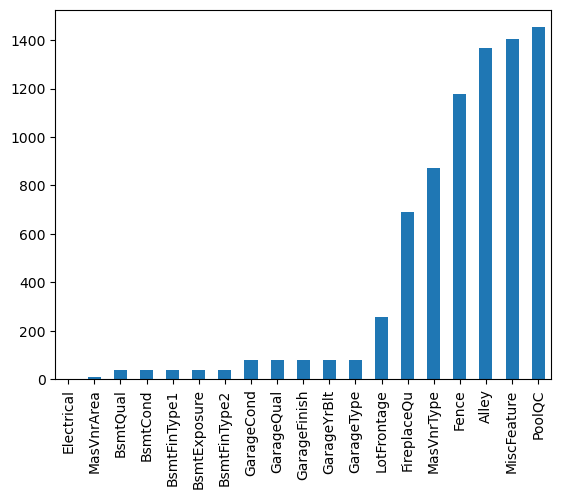

In [26]:
# Visualization of number of missing values 
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [27]:
# Numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Columns with numeric values:", numeric_columns)

Columns with numeric values: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


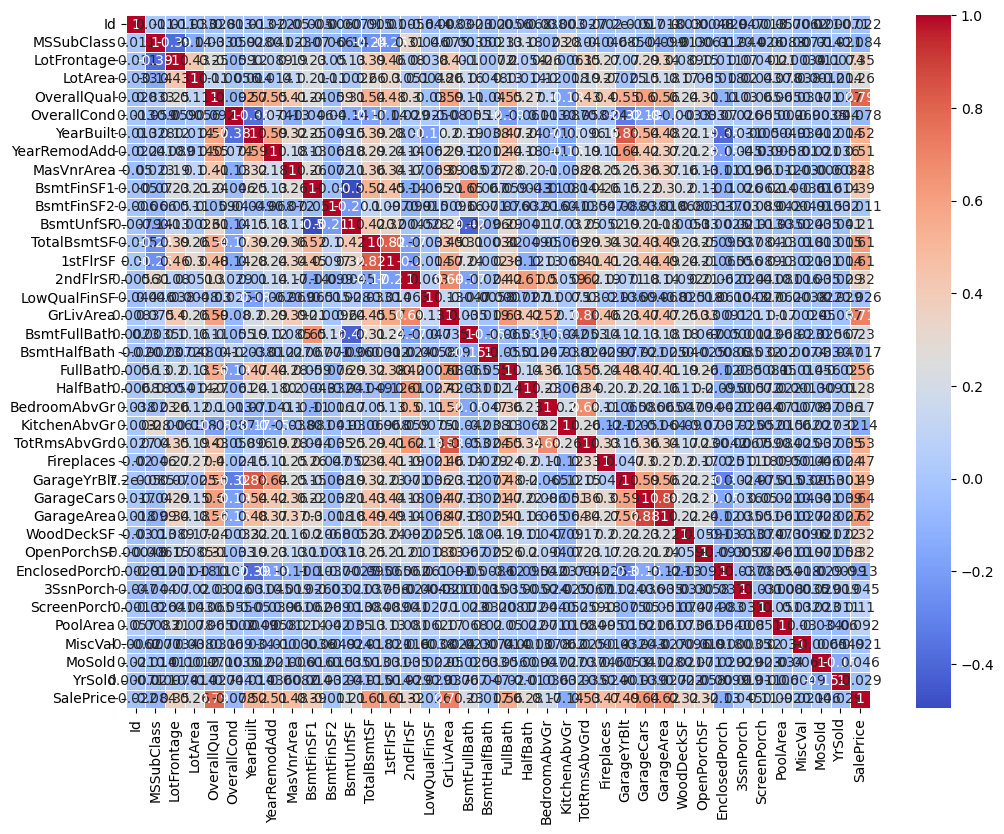

In [28]:
# See the correlation of each feature to each other
numeric_df = df[numeric_columns]
plt.subplots(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

/Users/mayi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


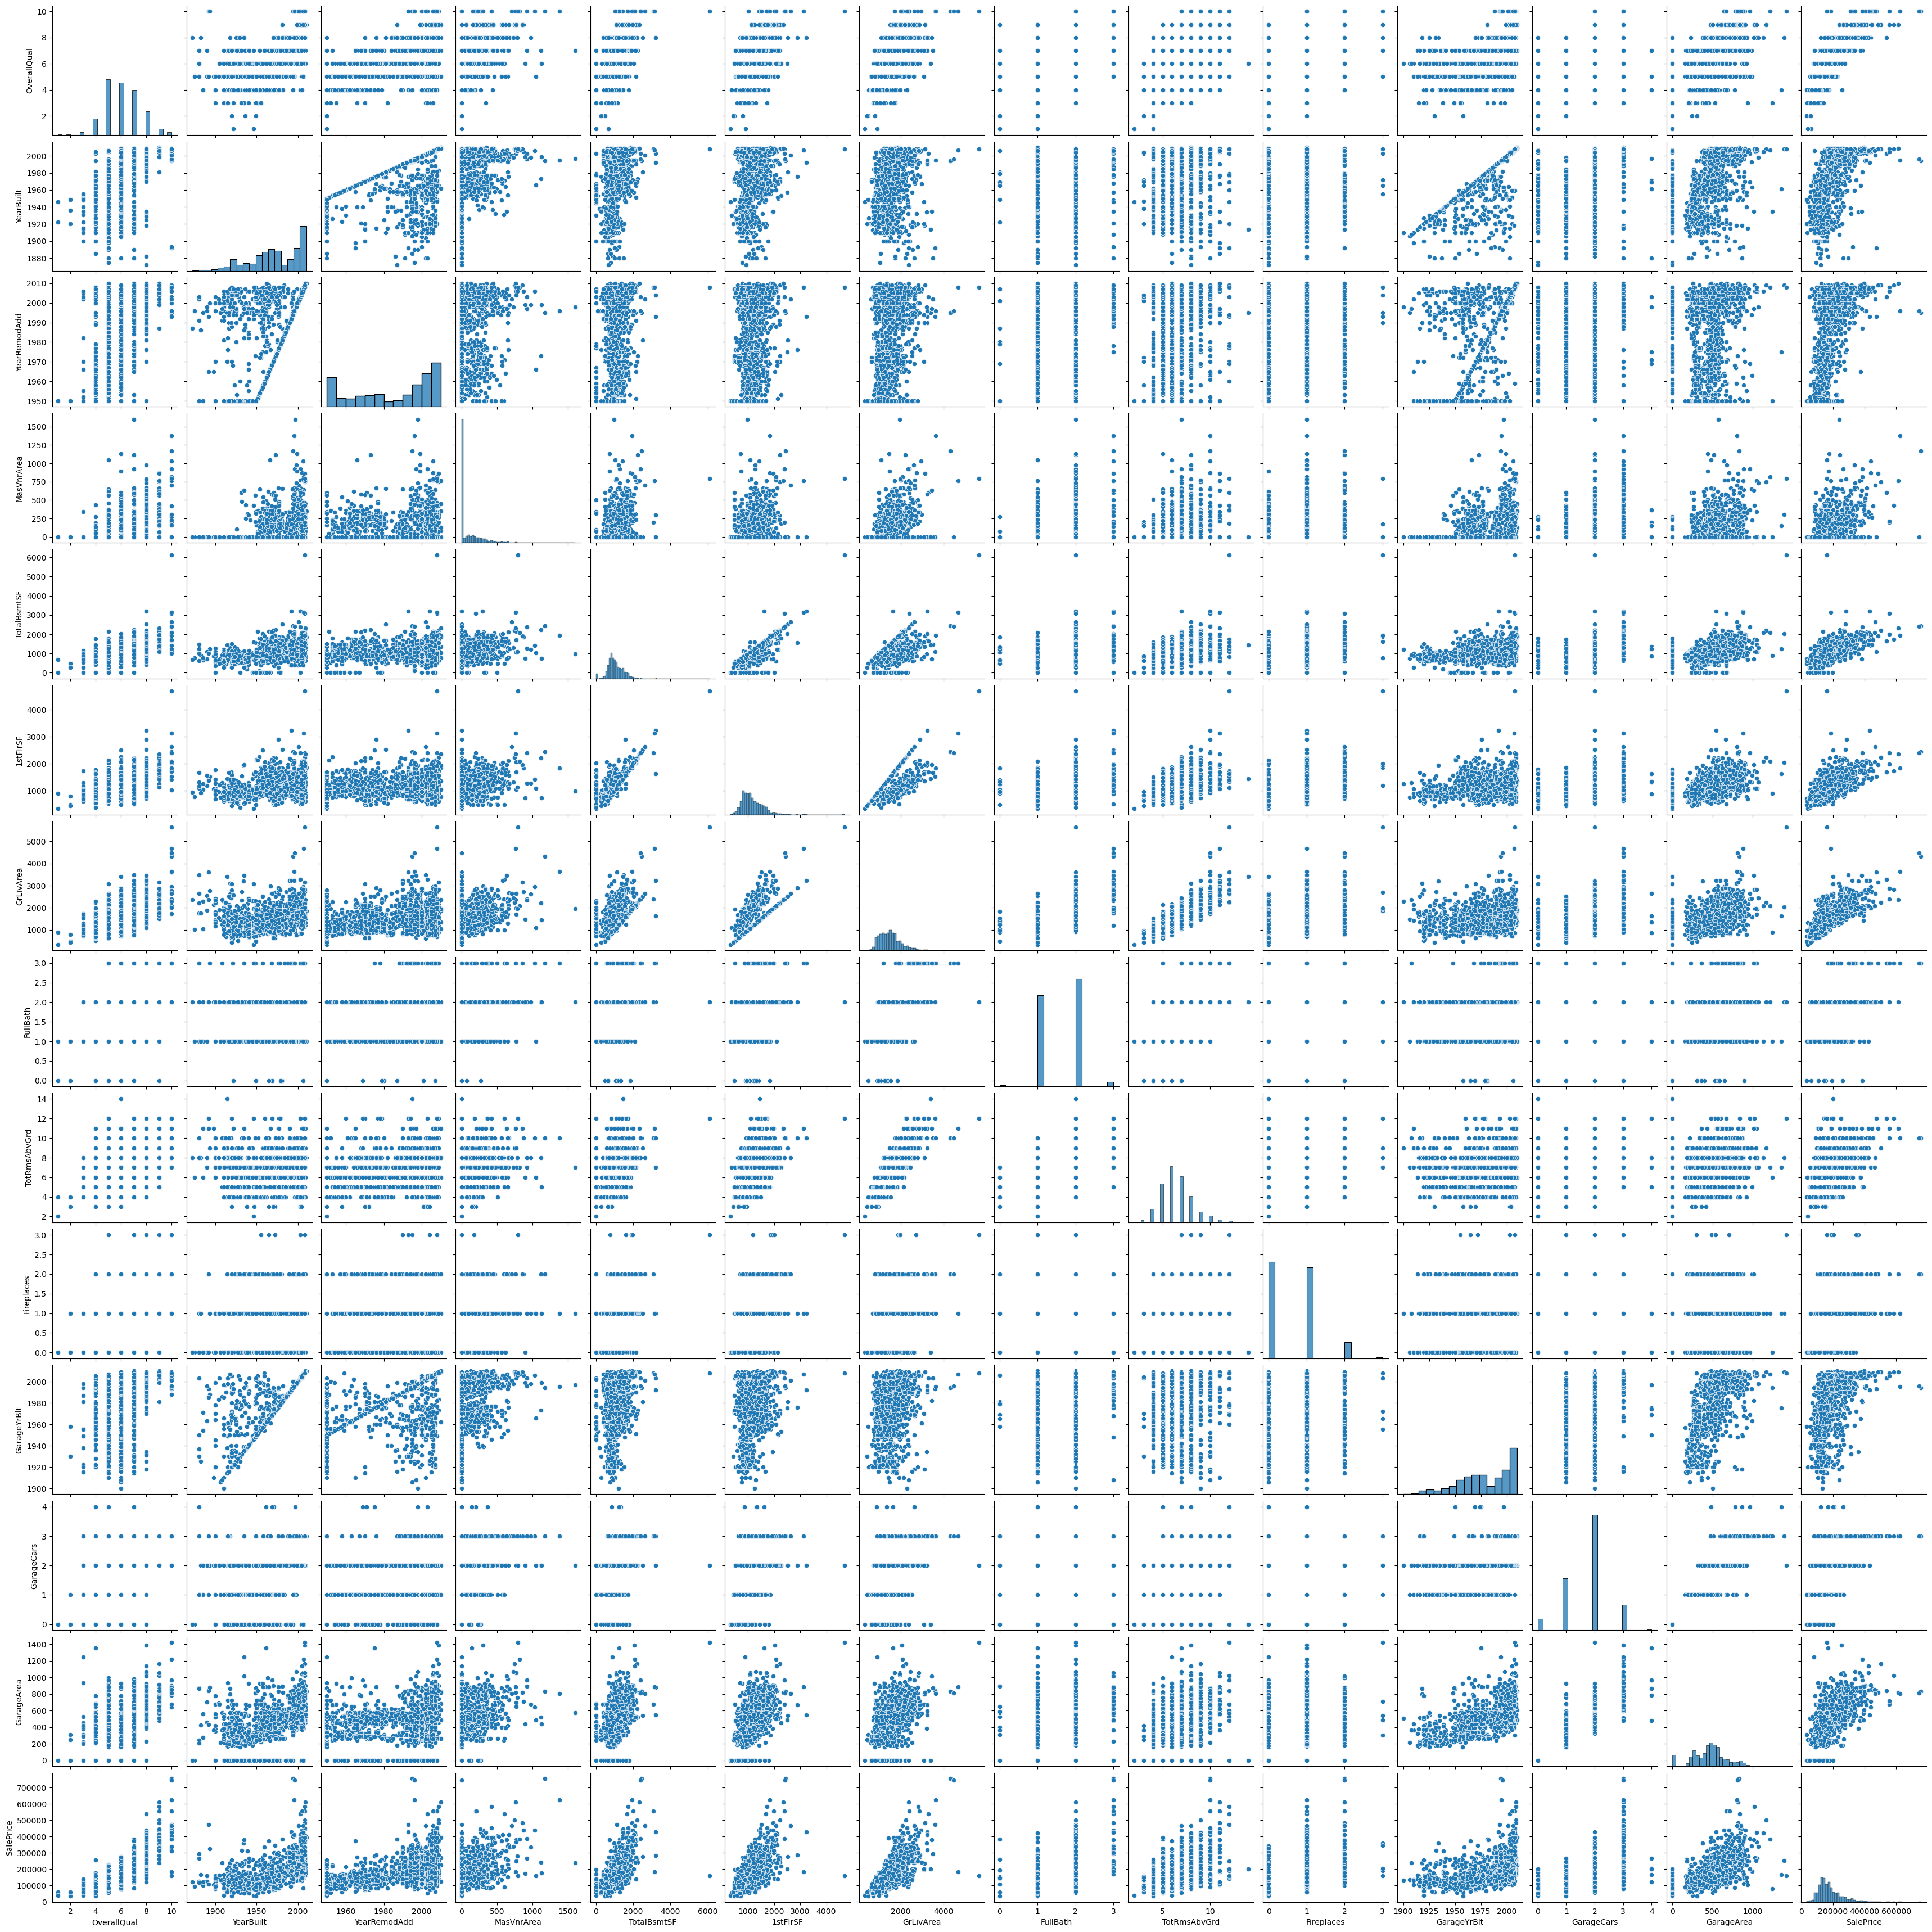

In [30]:
## create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'])
plt.show()

In [31]:
# include numerical features whose correlation coefficient is greater than the threshold
threshold = 0.45
corr_number = pd.DataFrame([df[i].corr(df.SalePrice) for i in df.select_dtypes(include = 'number')],
             index = df.select_dtypes(include = 'number').columns, columns = ['SalePrice'])
corr_number.loc[corr_number.SalePrice > threshold,:].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

SalePrice  GrLivArea
523      184750       4676
691      755000       4316
1182     745000       4476
1298     160000       5642

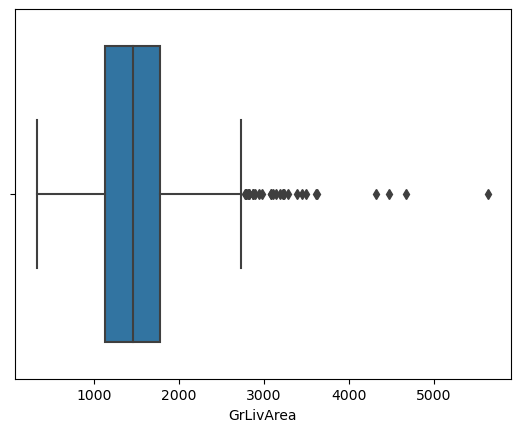

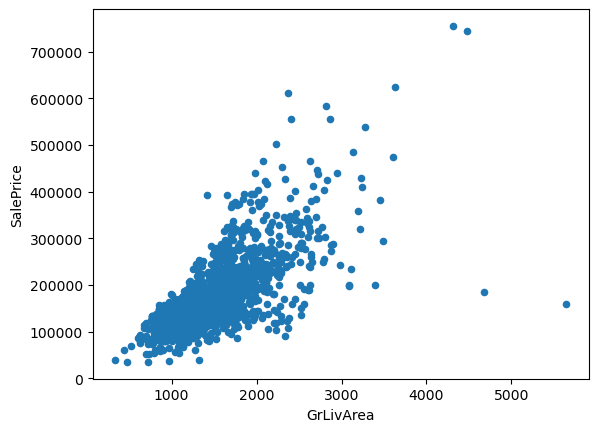

In [32]:
# plot graphs to see the relationship between these features and SalePrice clearly and remove outlier
sns.boxplot(x=df.GrLivArea)
df.plot(x="GrLivArea",y ="SalePrice", kind="scatter")
df.loc[df.GrLivArea > 4000,["SalePrice","GrLivArea"]]

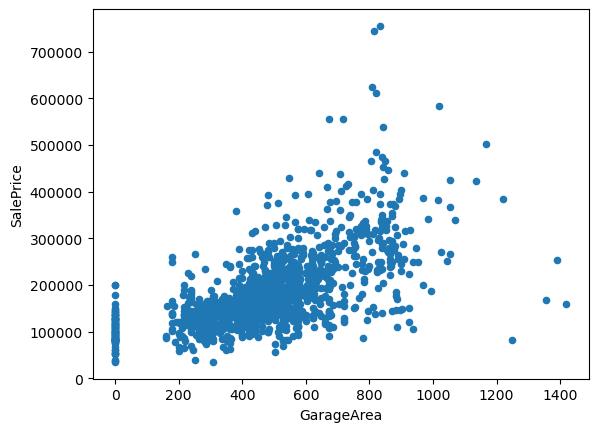

In [33]:
# plot graphs to see the relationship between these features and SalePrice clearly and remove outlier
df.plot(x="GarageArea",y ="SalePrice", kind="scatter")
df.loc[df.GarageArea > 1200,["SalePrice","GarageArea"]]
df.drop(axis=0, index=1298,inplace=True)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

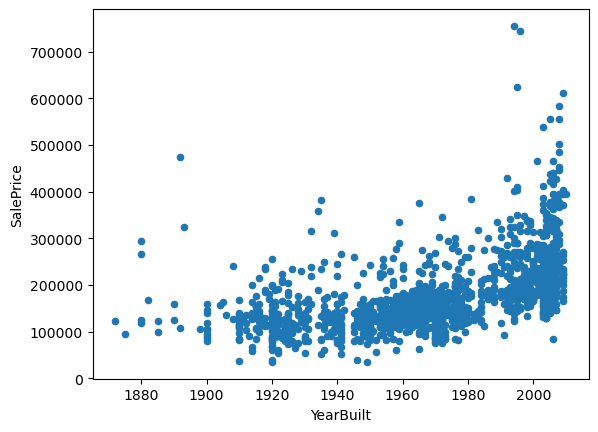

In [34]:
# plot graphs to see the relationship between these features and SalePrice clearly
df.plot(x="YearBuilt",y ="SalePrice", kind="scatter")

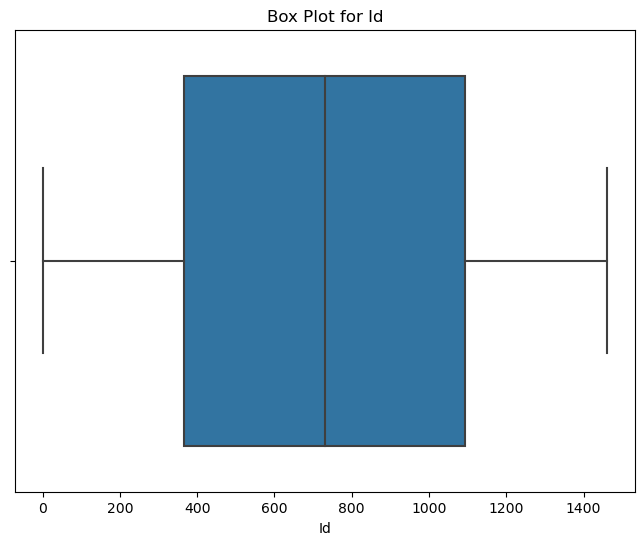

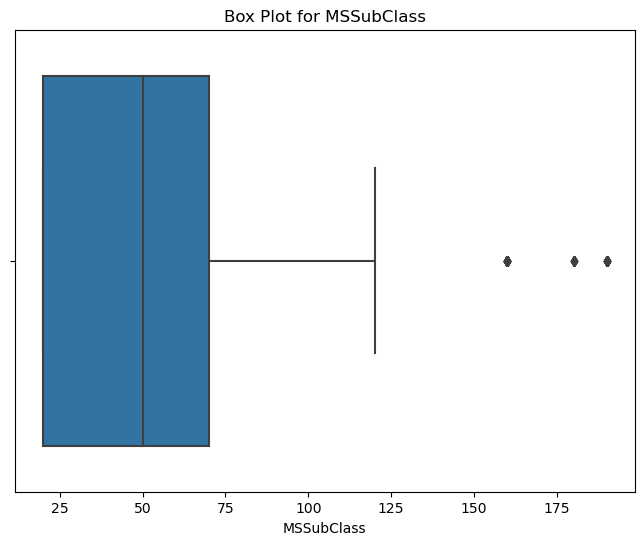

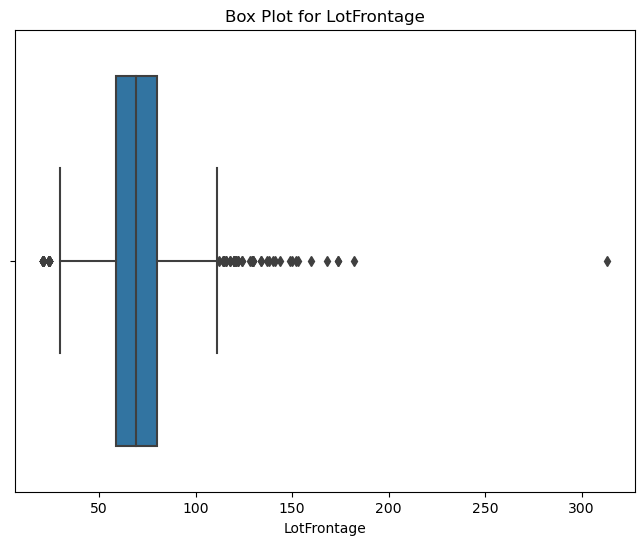

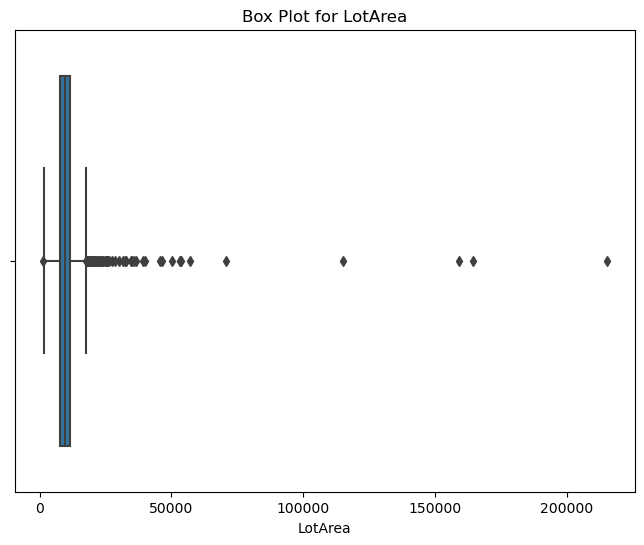

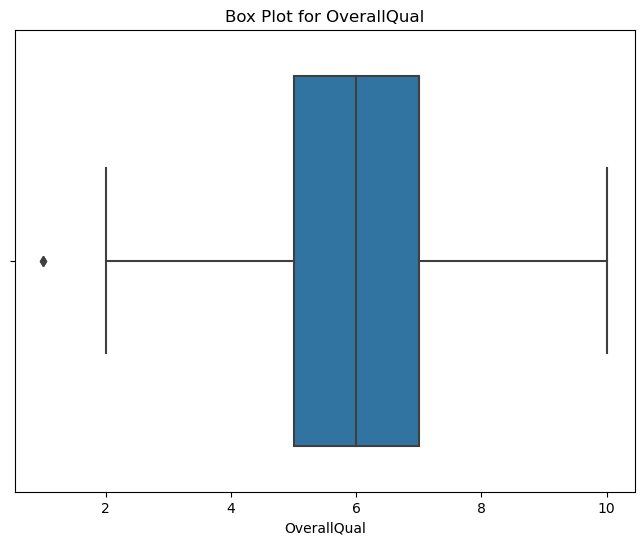

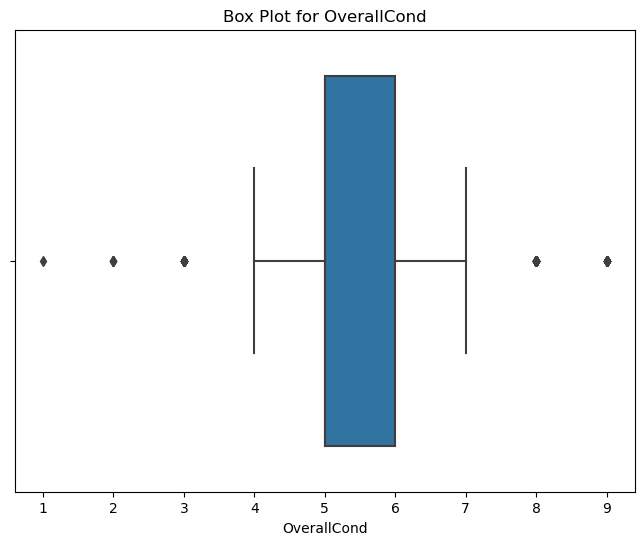

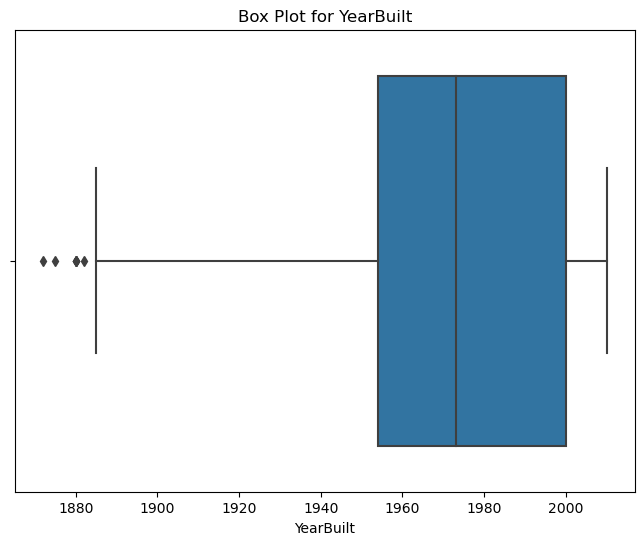

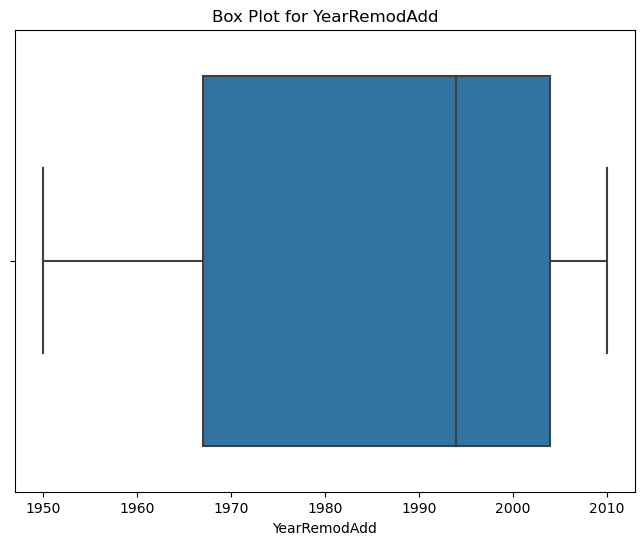

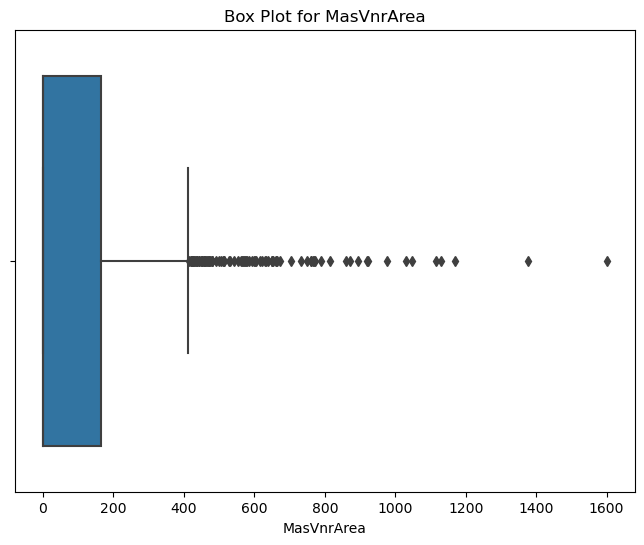

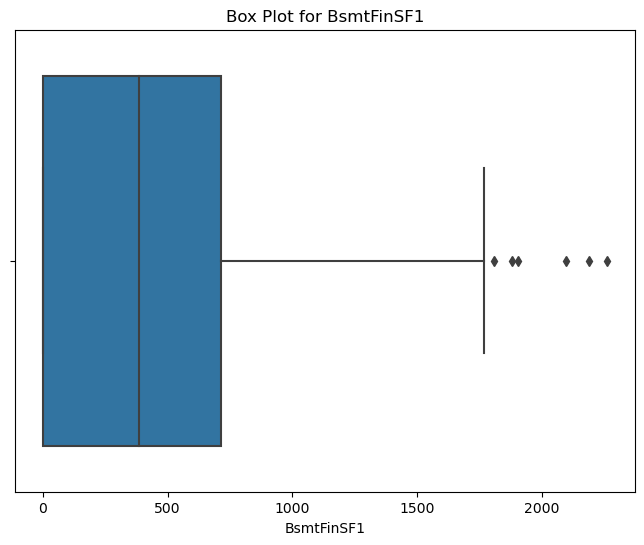

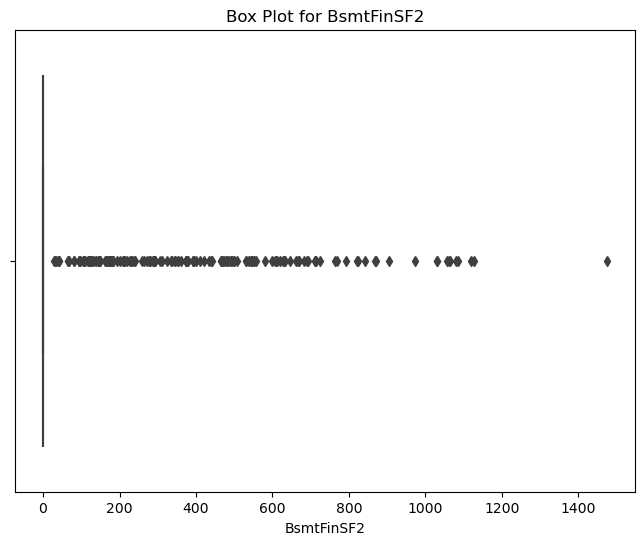

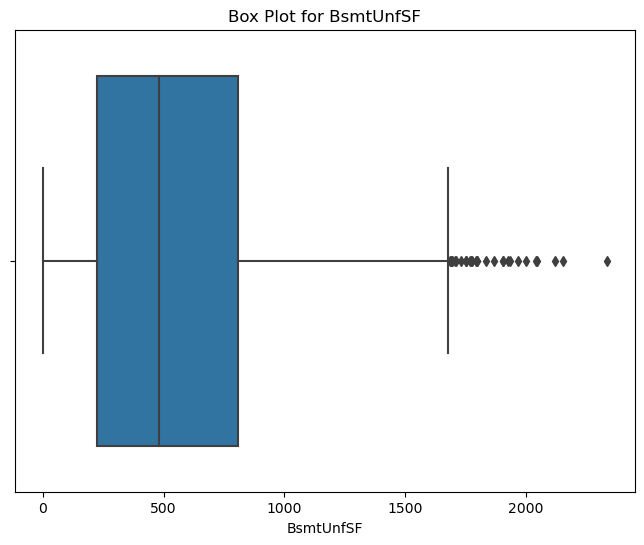

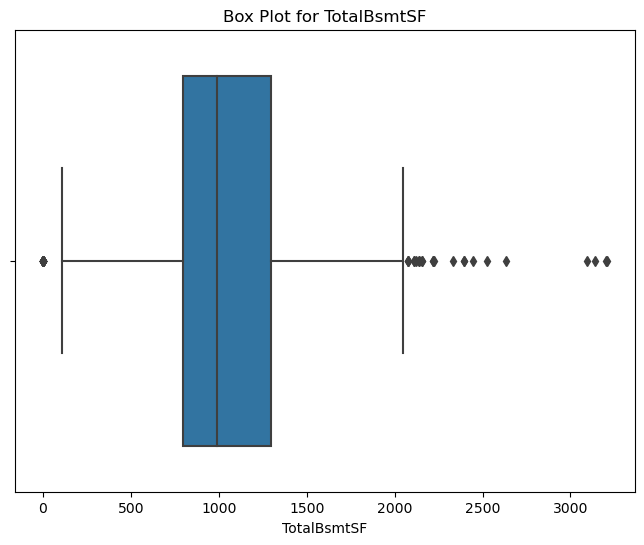

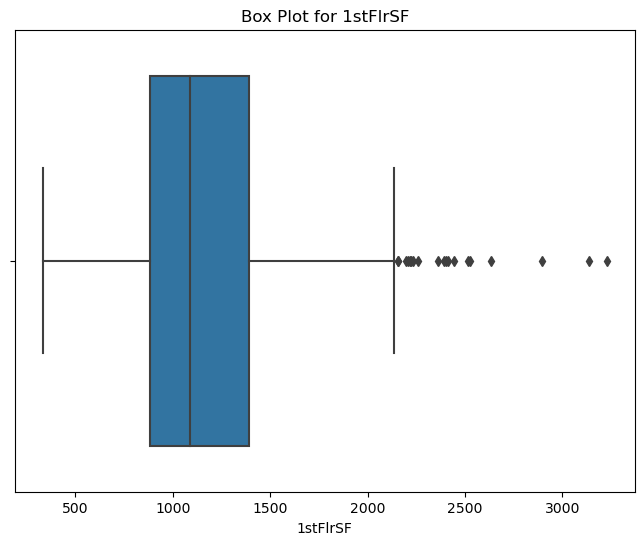

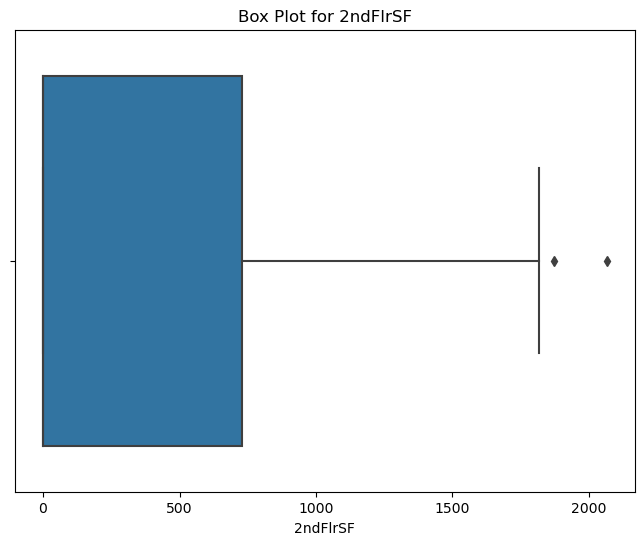

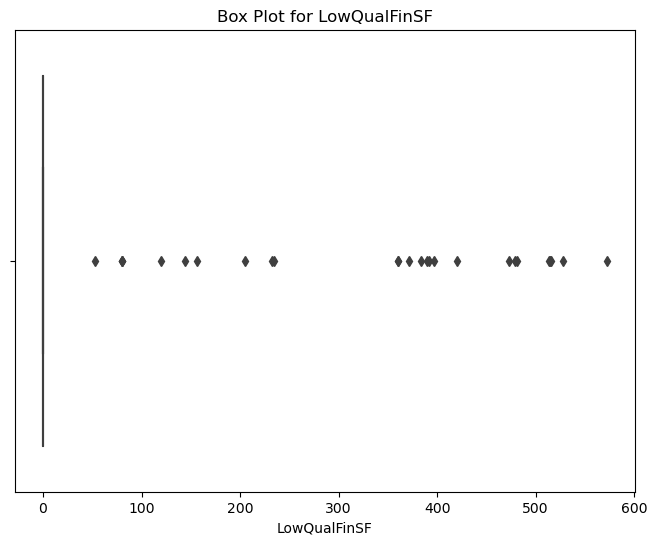

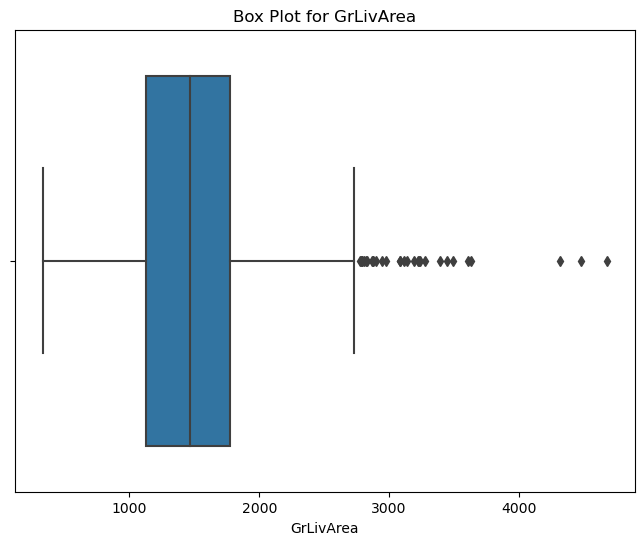

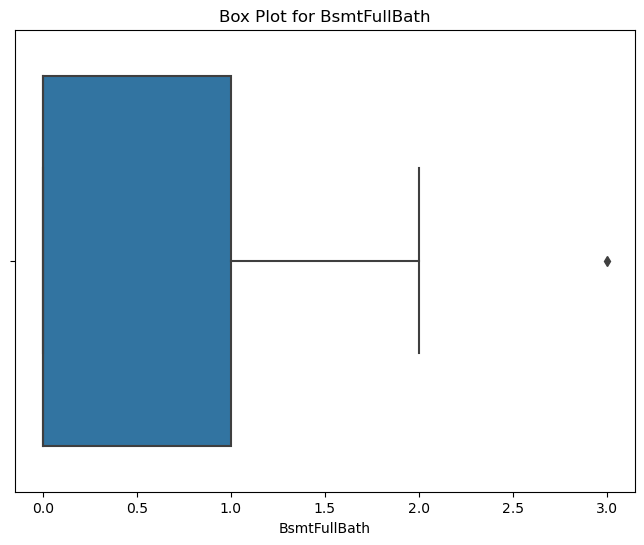

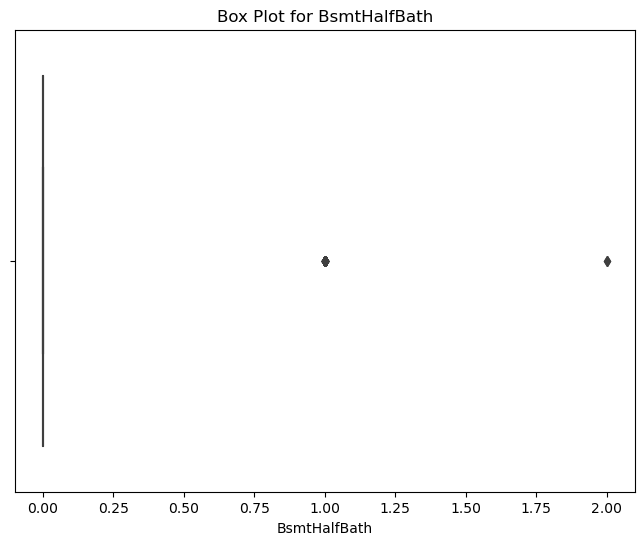

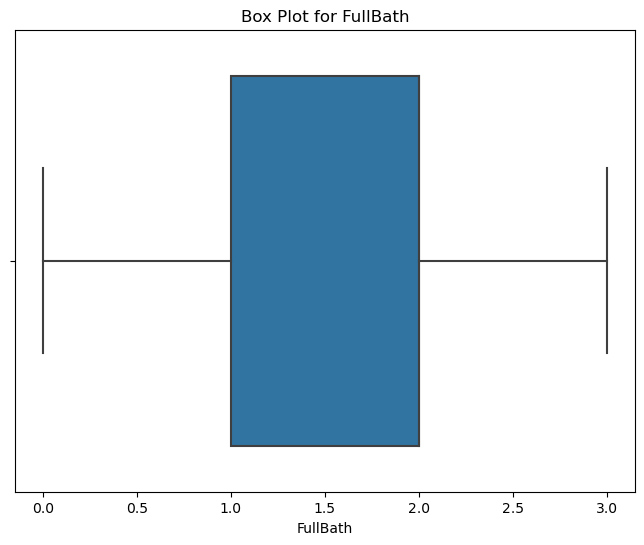

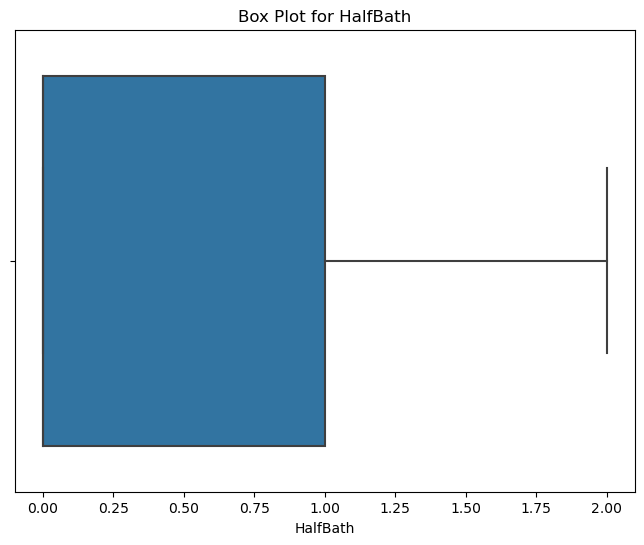

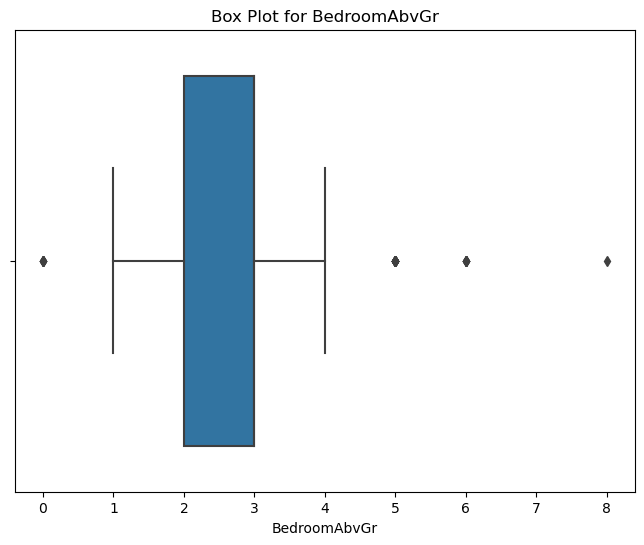

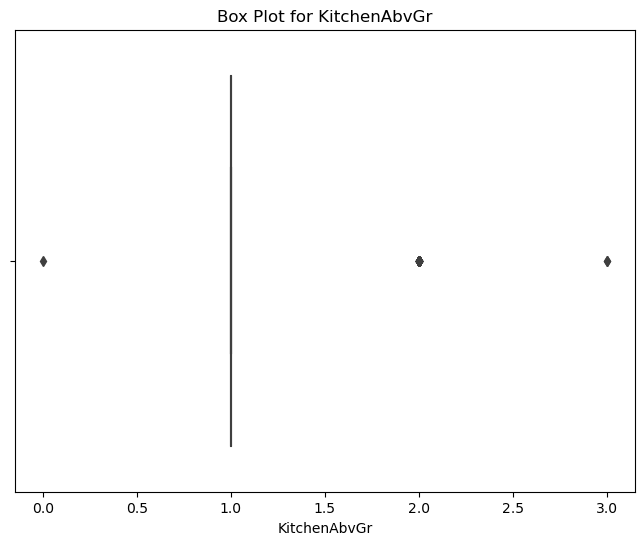

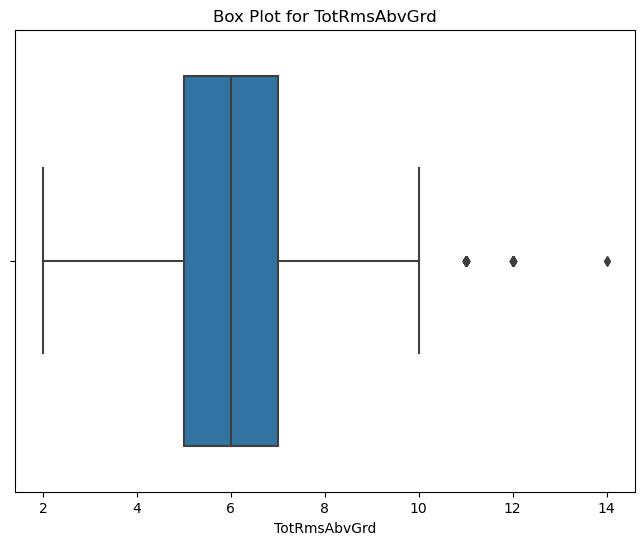

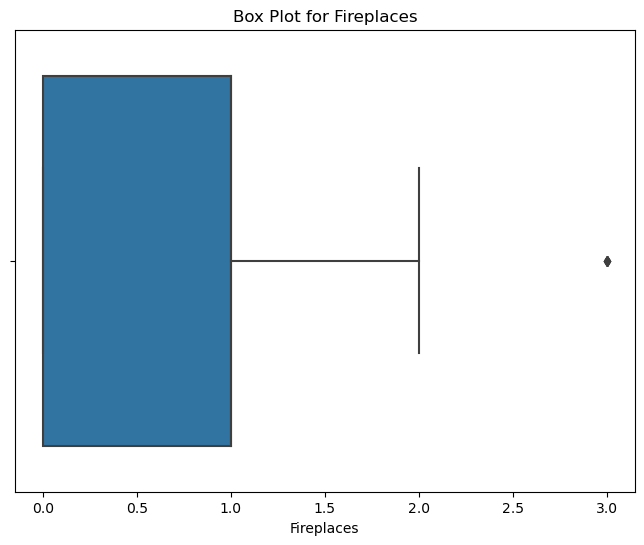

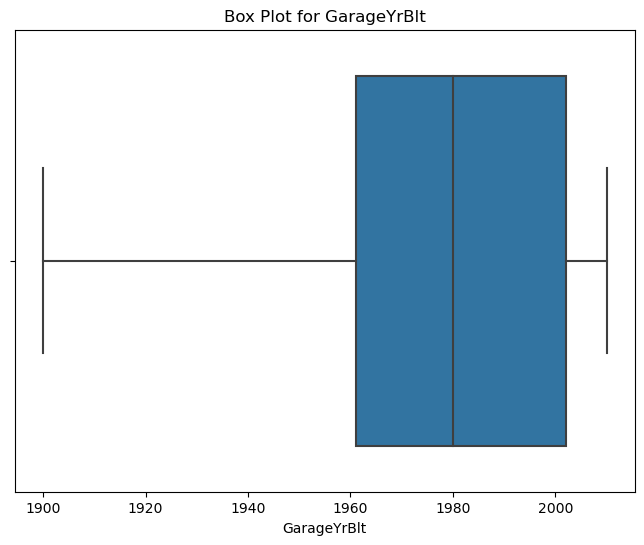

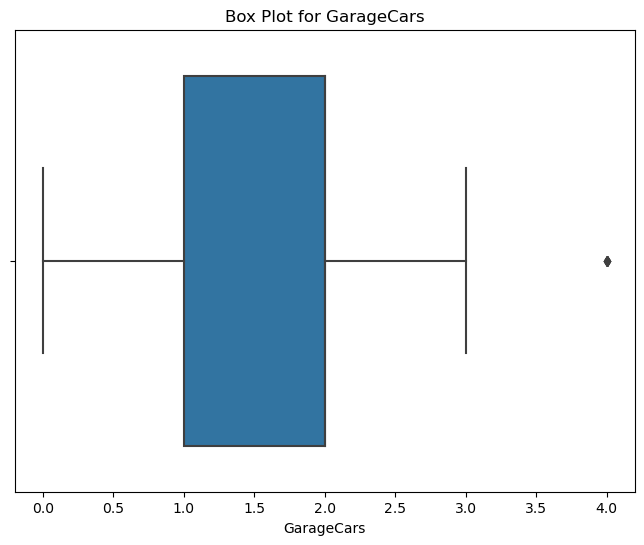

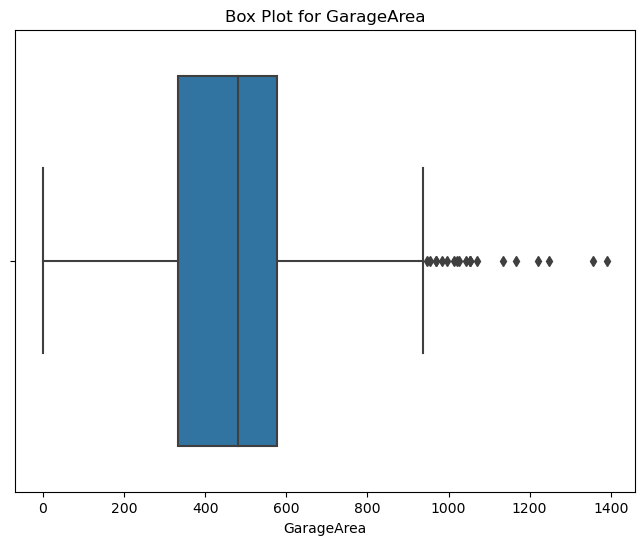

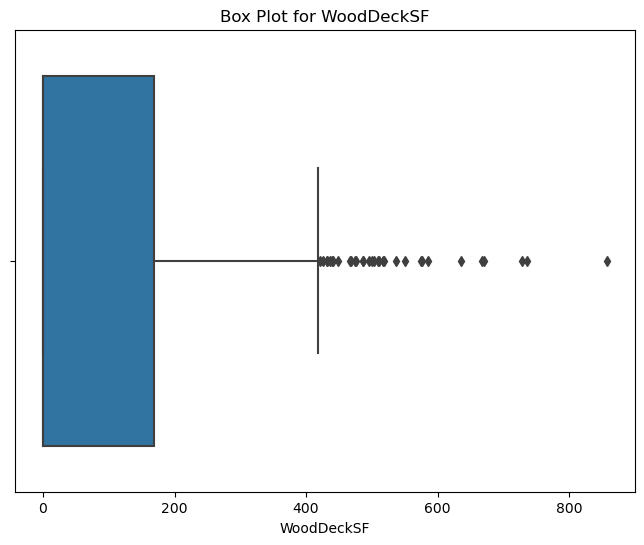

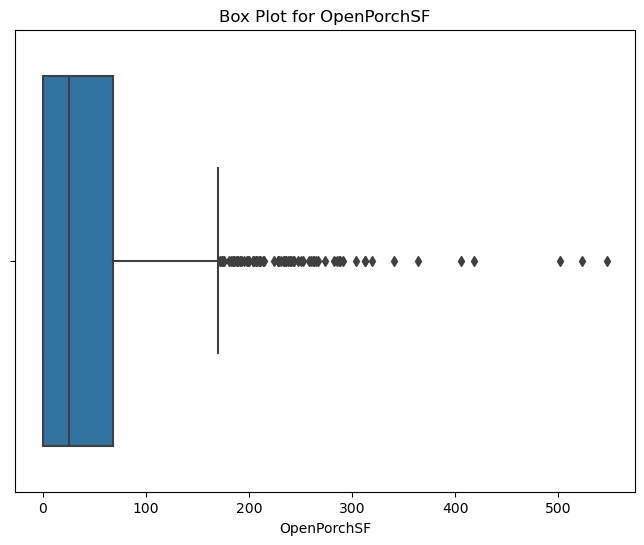

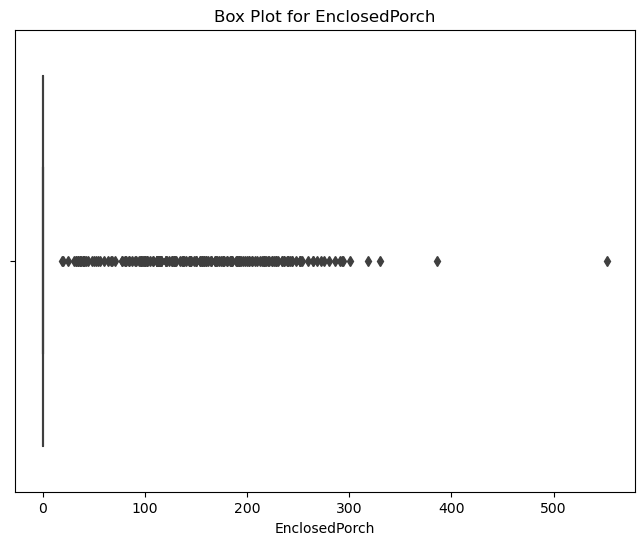

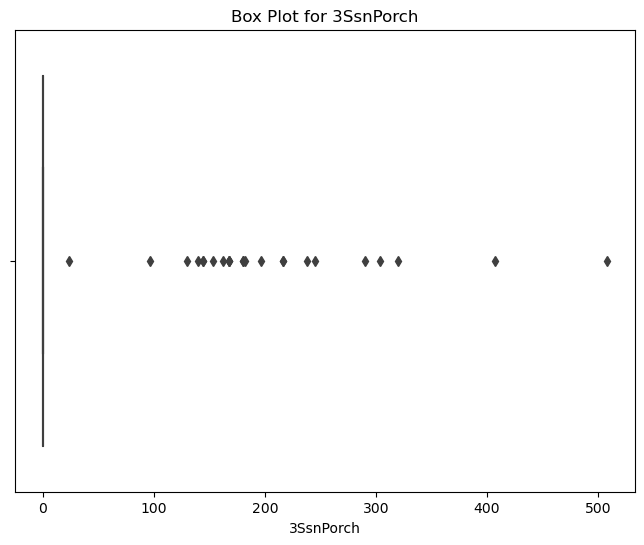

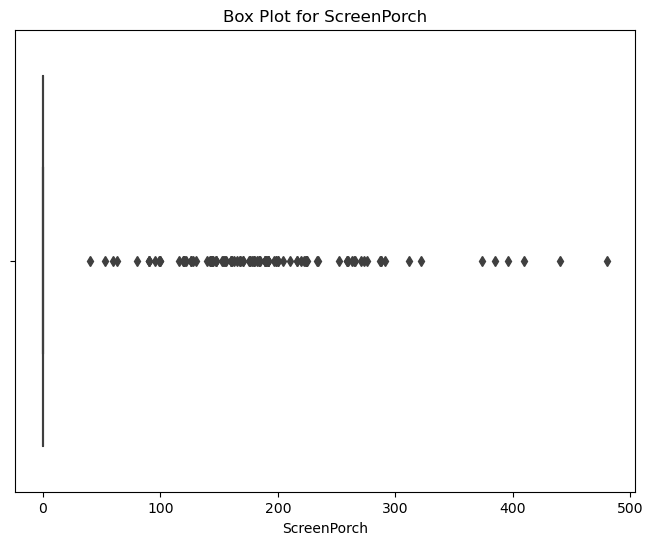

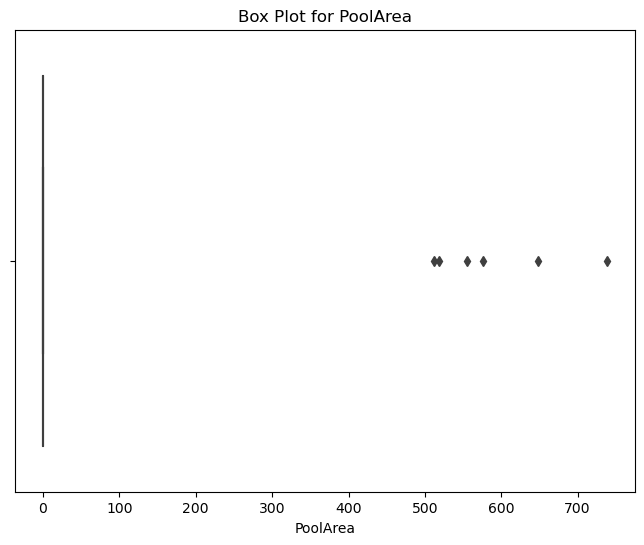

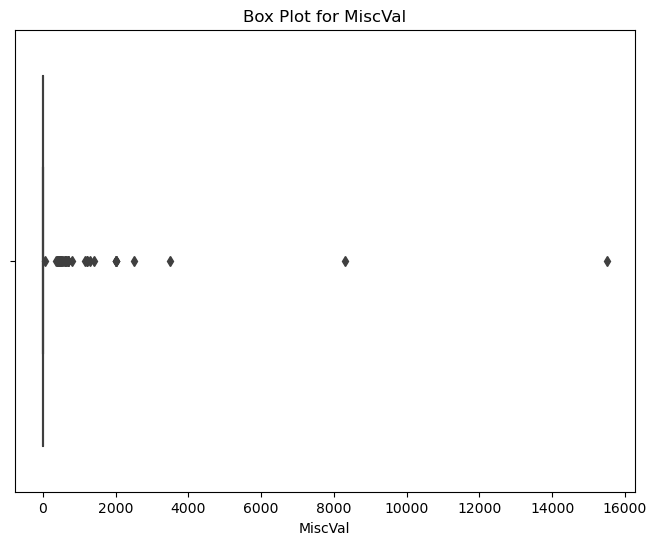

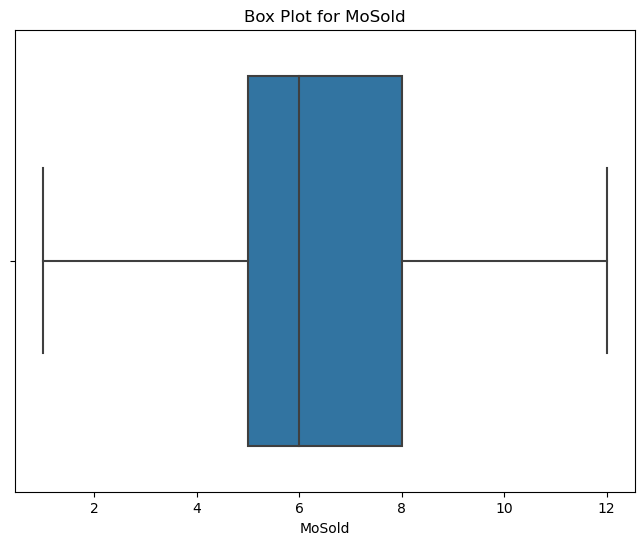

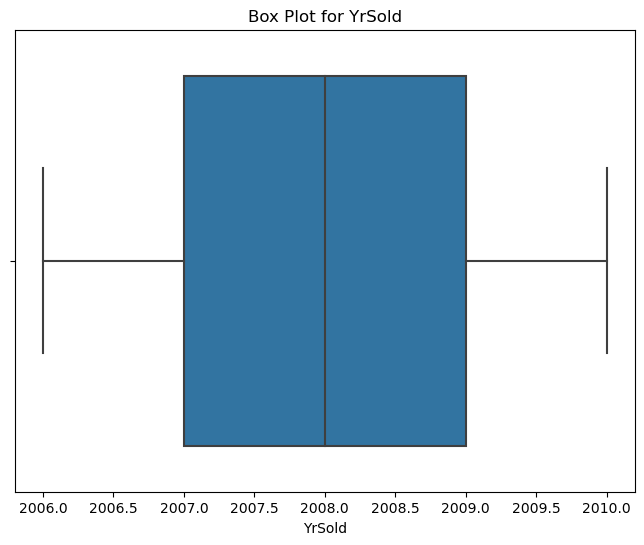

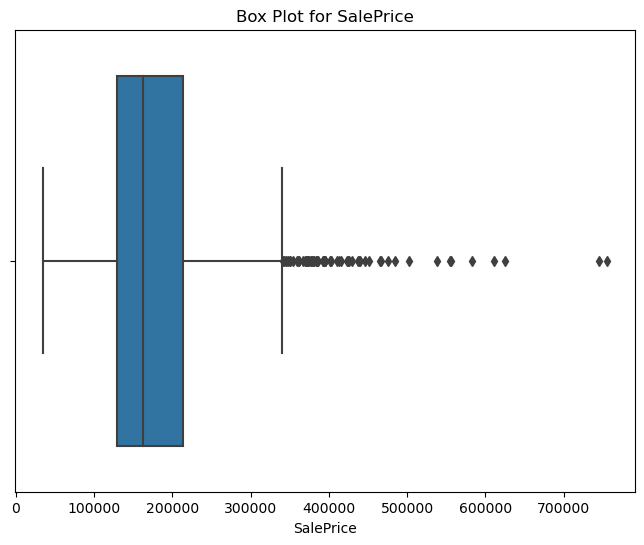

               Missing Values  Missing Values Percentage  Duplicate Records  \
1stFlrSF                    0                   0.000000                  0   
2ndFlrSF                    0                   0.000000                  0   
3SsnPorch                   0                   0.000000                  0   
Alley                    1369                  93.831391                  0   
BedroomAbvGr                0                   0.000000                  0   
BldgType                    0                   0.000000                  0   
BsmtCond                   37                   2.535984                  0   
BsmtExposure               38                   2.604524                  0   
BsmtFinSF1                  0                   0.000000                  0   
BsmtFinSF2                  0                   0.000000                  0   
BsmtFinType1               37                   2.535984                  0   
BsmtFinType2               38                   2.60

In [35]:
# Create quality report for numerical values
def data_quality_report(df):

  # missing values
  missing_values_percentage = missing_values / df.shape[0] * 100

  # duplicate records
  duplicate_records = df[df.duplicated()]
    
  # Check for outliers
  numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
  Q1 = df[numeric_columns].quantile(0.25)
  Q3 = df[numeric_columns].quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
  outliers_count = outliers.sum()

  # Create a data quality report dataframe
  report = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Values Percentage": missing_values_percentage,
    "Duplicate Records": duplicate_records.shape[0],
    "Outliers": outliers_count
  })

    # Visualize outliers using box plots
  for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

  return report

# Create the data quality report
report = data_quality_report(df)

# Print the report
print(report)

In [36]:
# filling in missing values of MasVnrArea
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)

In [43]:
# Numerical features to include when training
feature_numerical = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'TotRmsAbvGrd', 'Fireplaces', 'MSSubClass']

In [37]:
# Identify categorical features
cat_f = df.select_dtypes(include="object")
cat_f.head()
cat_f.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
# Check for missing values of categorical columns
missing_percent = pd.DataFrame(cat_f.isna().mean(axis=0)*100, columns=["Missing %"])
total_missing = pd.DataFrame(cat_f.isna().sum(axis=0),columns=["Total Missing"])
cat_misstable = pd.concat([missing_percent,total_missing],axis = 1)
cat_misstable.loc[cat_misstable['Total Missing'] > 0,:].sort_values(by = "Missing %", ascending = False)

Missing %  Total Missing
PoolQC        99.588759           1453
MiscFeature   96.298835           1405
Alley         93.762851           1368
Fence         80.740233           1178
MasVnrType    59.766964            872
FireplaceQu   47.292666            690
GarageType     5.551748             81
GarageFinish   5.551748             81
GarageQual     5.551748             81
GarageCond     5.551748             81
BsmtExposure   2.604524             38
BsmtFinType2   2.604524             38
BsmtQual       2.535984             37
BsmtCond       2.535984             37
BsmtFinType1   2.535984             37
Electrical     0.068540              1

In [39]:
# fill NA values with appropriate information.
df.Alley.fillna("no", inplace = True)

for i in cat_f.columns:
    print(df.groupby(by=df[i]).SalePrice.mean())
    print()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191031.955652
RM         126316.830275
Name: SalePrice, dtype: float64

Street
Grvl    130190.500000
Pave    181145.081211
Name: SalePrice, dtype: float64

Alley
Grvl    122219.080000
Pave    168000.585366
no      183469.274854
Name: SalePrice, dtype: float64

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    222262.777778
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour
Bnk    142831.564516
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

Utilities
AllPub    180965.326475
NoSeWa    137500.000000
Name: SalePrice, dtype: float64

LotConfig
Corner     181705.958015
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

LandSlope
Gtl    179971.250543
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    

In [40]:
for df in [df]:
    for i in ['BsmtQual','BsmtCond']:
        df[i].fillna('no',inplace= True)
        print (df.BsmtQual.value_counts())

BsmtQual
TA    649
Gd    618
Ex    120
no     37
Fa     35
Name: count, dtype: int64
BsmtQual
TA    649
Gd    618
Ex    120
no     37
Fa     35
Name: count, dtype: int64


In [41]:
for df in [df]:
    for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond']:
        df[i] = df[i].map({'TA':3, 'Gd':2, 'Ex':1, 'Po':5, 'Fa':4,'no': 5})

In [42]:
# Categorical features to include when training
feature_categorical = ['ExterQual','ExterCond','BsmtQual']

In [44]:
# Features to include when training
final_features = feature_numerical + feature_categorical
final_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'TotRmsAbvGrd',
 'Fireplaces',
 'MSSubClass',
 'ExterQual',
 'ExterCond',
 'BsmtQual']